# 회귀분석

## 1. 다중선형회귀
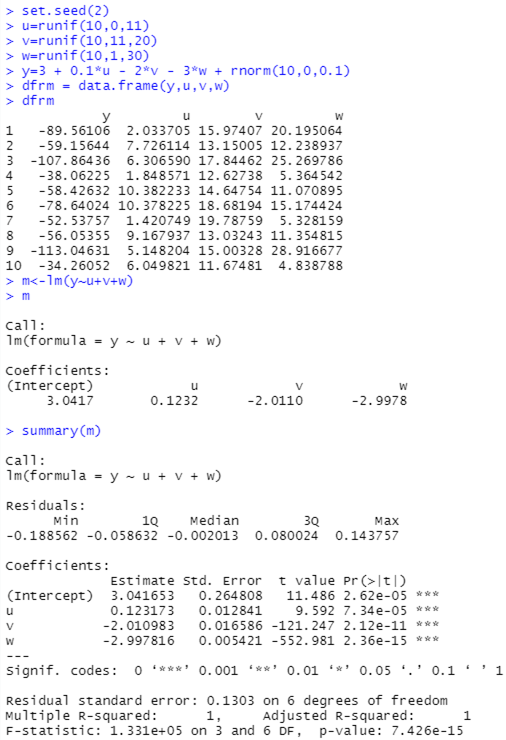

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [2]:
np.random.seed(2)
u = np.random.rand(10) * 11        # 0 ~ 11
v = (np.random.rand(10) * 11) + 11 # 11 ~ 22
w = (np.random.rand(10) * 29) + 1  # 1 ~ 30
y = 3 + 0.1*u + 2*v - 3*w + np.random.rand(10) * 0.1

data = {'y':y, 'u':u, 'v':v, 'w':w}
df = pd.DataFrame(data)
df

,y,u,v,w
0,-7.765092,4.795944,17.832472,15.652137
1,28.009893,0.285189,16.820563,2.893309
2,-11.617214,6.046287,12.480379,13.415548
3,25.427691,4.788546,16.649359,3.799397
4,15.507688,4.624046,13.028839,4.687639
5,-12.237411,3.633683,19.638687,18.305614
6,21.428890,2.251135,20.393728,7.554348
7,24.308134,6.811981,16.436605,4.101425
8,21.803563,3.296201,20.312176,7.388880
9,-6.319101,2.935100,11.876100,11.144962


In [5]:
# 상수항 추가
X = sm.add_constant(df[['u','v','w']])

# OLS 검정
multi_model = sm.OLS(df[['y']], X)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.780e+06
Date:                Sun, 27 Dec 2020   Prob (F-statistic):           3.10e-18
Time:                        15:45:43   Log-Likelihood:                 26.482
No. Observations:                  10   AIC:                            -44.96
Df Residuals:                       6   BIC:                            -43.75
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0694      0.048     63.601      0.000       2.951       3.187
u              0.1023      0.004     24.656      0.000       0.092       0.112
v              1.9980      0.002    815.885      0.000       1.992       2.004
w             -2.9995      0.001  -2170.504      0.000      -3.003      -2.996
==============================================================================
Omnibus:                        7.802   Durbin-Watson:                   2.221
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                3.012
Skew:                           1.194   Prob(JB):                        0.222
Kurtosis:                       4.237   Cond. No.                         135.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 2. 식이요법을 적용한 닭 데이터
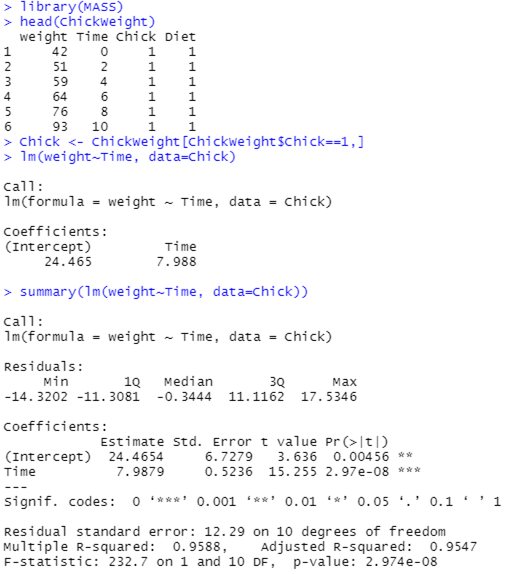

In [6]:
ChickWeight = pd.read_csv('ChickWeight.csv')
ChickWeight.head()

,weight,Time,Chick,Diet
0,42,0,1,1
1,51,2,1,1
2,59,4,1,1
3,64,6,1,1
4,76,8,1,1


In [7]:
Chick = ChickWeight[ChickWeight['Chick']==1]

In [8]:
import statsmodels.formula.api as smf

result = smf.ols(formula='weight ~ Time', data=Chick).fit()
result.summary()

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     232.7
Date:                Sun, 27 Dec 2020   Prob (F-statistic):           2.97e-08
Time:                        16:01:20   Log-Likelihood:                -46.039
No. Observations:                  12   AIC:                             96.08
Df Residuals:                      10   BIC:                             97.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.4654      6.728      3.636      0.005       9.475      39.456
Time           7.9879      0.524     15.255      0.000       6.821       9.155
==============================================================================
Omnibus:                        3.840   Durbin-Watson:                   0.342
Prob(Omnibus):                  0.147   Jarque-Bera (JB):                1.217
Skew:                           0.211   Prob(JB):                        0.544
Kurtosis:                       1.498   Cond. No.                         24.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 3. cars 데이터
* dist가 speed의 변화에 따라 어떻게 변화하는지 회귀분석
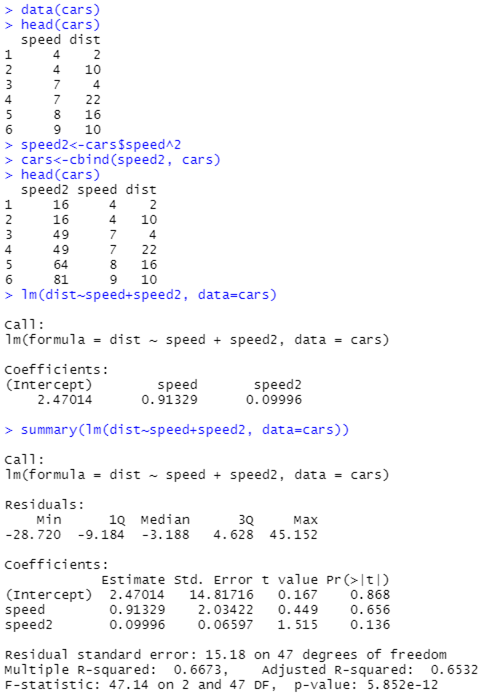

In [11]:
cars = pd.read_csv('cars.csv')
cars.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [12]:
cars['speed2'] = cars['speed'] **2
cars.head()

,speed,dist,speed2
0,4,2,16
1,4,10,16
2,7,4,49
3,7,22,49
4,8,16,64


In [13]:
import statsmodels.formula.api as smf

result = smf.ols(formula='dist ~ speed+speed2', data=cars).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   dist   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     47.14
Date:                Sun, 27 Dec 2020   Prob (F-statistic):           5.85e-12
Time:                        16:21:04   Log-Likelihood:                -205.39
No. Observations:                  50   AIC:                             416.8
Df Residuals:                      47   BIC:                             422.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4701     14.817      0.167      0.868     -27.338      32.278
speed          0.9133      2.034      0.449      0.656      -3.179       5.006
speed2         0.1000      0.066      1.515      0.136      -0.033       0.233
==============================================================================
Omnibus:                       11.173   Durbin-Watson:                   1.762
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.061
Skew:                           0.991   Prob(JB):                      0.00396
Kurtosis:                       4.173   Cond. No.                     2.16e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 4. 적절한 회귀 모형 찾기(산점도 & 잔차도 활용)
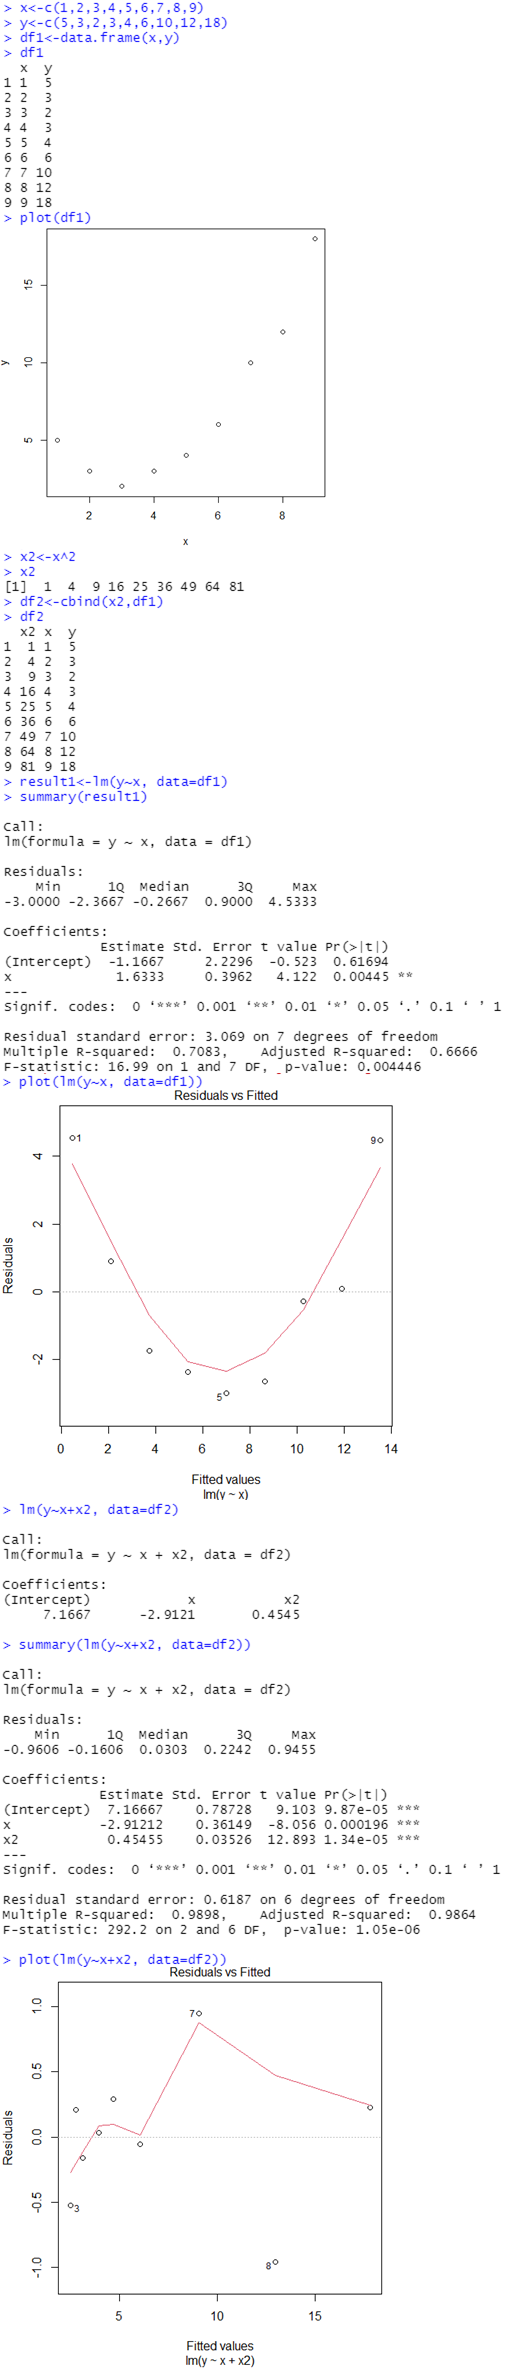

In [14]:
x = [1,2,3,4,5,6,7,8,9]
y = [5,3,2,3,4,6,10,12,18]
data = {'x' : x, 'y' : y}
df1 = pd.DataFrame(data)
df1

,x,y
0,1,5
1,2,3
2,3,2
3,4,3
4,5,4
5,6,6
6,7,10
7,8,12
8,9,18


### pandas 산점도

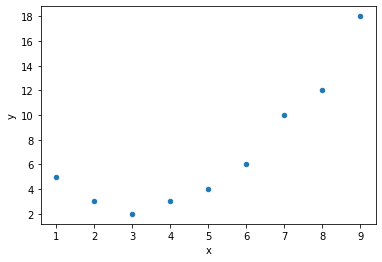

In [18]:
df1.plot.scatter(x='x', y='y')

### seaborn 산점도

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

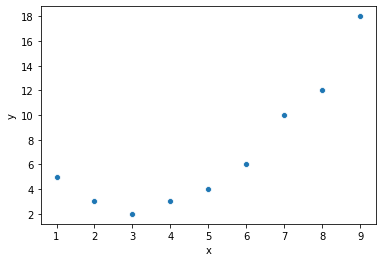

In [21]:
sns.scatterplot(x='x', y='y', data=df1)

In [22]:
df2 = df1.copy()
df2['x2'] = df2['x']**2
df2

,x,y,x2
0,1,5,1
1,2,3,4
2,3,2,9
3,4,3,16
4,5,4,25
5,6,6,36
6,7,10,49
7,8,12,64
8,9,18,81


* df1

In [23]:
import statsmodels.formula.api as smf

result1 = smf.ols(formula='y ~ x', data=df1).fit()
result1.summary()

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     16.99
Date:                Sun, 27 Dec 2020   Prob (F-statistic):            0.00445
Time:                        16:54:57   Log-Likelihood:                -21.732
No. Observations:                   9   AIC:                             47.46
Df Residuals:                       7   BIC:                             47.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1667      2.230     -0.523      0.617      -6.439       4.106
x              1.6333      0.396      4.122      0.004       0.696       2.570
==============================================================================
Omnibus:                        1.451   Durbin-Watson:                   0.696
Prob(Omnibus):                  0.484   Jarque-Bera (JB):                1.008
Skew:                           0.668   Prob(JB):                        0.604
Kurtosis:                       2.051   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

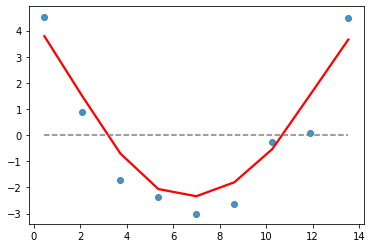

In [25]:
fitted = result1.predict(df1['x'])
residual = df1['y'] - fitted

sns.regplot(fitted, residual, lowess=True, line_kws={'color': 'red'})
plt.plot([fitted.min(), fitted.max()], [0, 0], '--', color='grey')

* df2

In [26]:
result2 = smf.ols(formula='y ~ x+x2', data=df2).fit()
result2.summary()

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     292.2
Date:                Sun, 27 Dec 2020   Prob (F-statistic):           1.05e-06
Time:                        16:58:38   Log-Likelihood:                -6.6251
No. Observations:                   9   AIC:                             19.25
Df Residuals:                       6   BIC:                             19.84
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.1667      0.787      9.103      0.000       5.240       9.093
x             -2.9121      0.361     -8.056      0.000      -3.797      -2.028
x2             0.4545      0.035     12.893      0.000       0.368       0.541
==============================================================================
Omnibus:                        0.843   Durbin-Watson:                   3.026
Prob(Omnibus):                  0.656   Jarque-Bera (JB):                0.023
Skew:                          -0.122   Prob(JB):                        0.989
Kurtosis:                       2.962   Cond. No.                         173.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

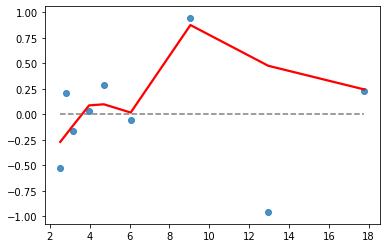

In [27]:
fitted = result2.predict(df2[['x', 'x2']])
residual = df2['y'] - fitted

sns.regplot(fitted, residual, lowess=True, line_kws={'color': 'red'})
plt.plot([fitted.min(), fitted.max()], [0, 0], '--', color='grey')

## 5. 최적회귀방적식 선택 : 설명변수 선택
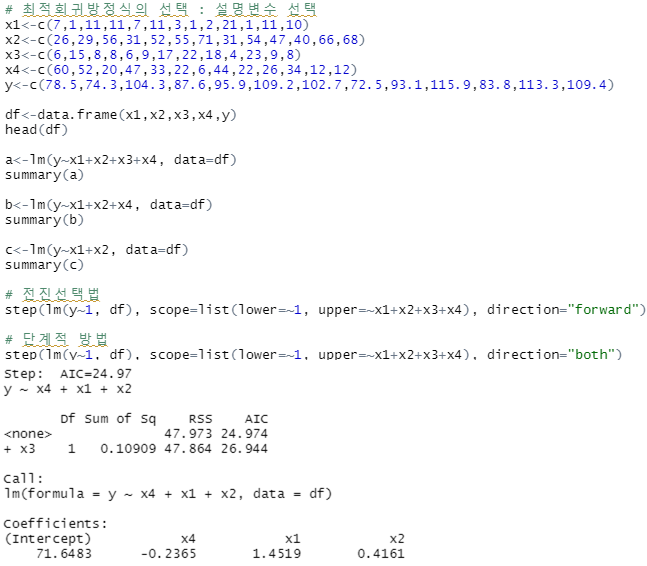

In [28]:
data = {'x1':[7,1,11,11,7,11,3,1,2,21,1,11,10],
        'x2':[26,29,56,31,52,55,71,31,54,47,40,66,68],
        'x3':[6,15,8,8,6,9,17,22,18,4,23,9,8],
        'x4':[60,52,20,47,33,22,6,44,22,26,34,12,12],
        'y':[78.5,74.3,104.3,87.6,95.9,109.2,102.7,72.5,93.1,115.9,83.8,113.3,109.4]}
df = pd.DataFrame(data)
df.head()

,x1,x2,x3,x4,y
0,7,26,6,60,78.5
1,1,29,15,52,74.3
2,11,56,8,20,104.3
3,11,31,8,47,87.6
4,7,52,6,33,95.9


In [95]:
feature_columns = df.columns.difference(["y"]) # Target column 빼기
X = df[feature_columns].copy()
y = df.y

X = sm.add_constant(X)
X.head()

,const,x1,x2,x3,x4
0,1.0,7,26,6,60
1,1.0,1,29,15,52
2,1.0,11,56,8,20
3,1.0,11,31,8,47
4,1.0,7,52,6,33


### A. 전진선택법

In [96]:
def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y, X[list(feature_set)])
    result = model.fit()
    aic = result.aic
    return {"model":result, "AIC":aic}

def forward(predictors):
    # predictor - 현재 선택되어있는 변수
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    
    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    
    results = []
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]+['const']))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['AIC'].argmin()]
        
    # Return the best model, along with some other useful information about the model
    return best_model


models_fwd = pd.DataFrame(columns=["AIC", "model"])

predictors = []
for i in range(1,len(X.columns.difference(['const']))+1):    
    result = forward(predictors)
    if i>1:
        if result['AIC'] > aic_before:
            break
    models_fwd.loc[i] = result
    predictors = models_fwd.loc[i]["model"].model.exog_names
    aic_before = models_fwd.loc[i]["AIC"]
    predictors = [k for k in predictors if k != 'const']

In [97]:
models_fwd

,AIC,model
1,95.744045,<statsmodels.regression.linear_model.Regressio...
2,65.634106,<statsmodels.regression.linear_model.Regressio...
3,61.866285,<statsmodels.regression.linear_model.Regressio...


In [98]:
models_fwd.iloc[-1]["model"].summary()

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     166.8
Date:                Sun, 27 Dec 2020   Prob (F-statistic):           3.32e-08
Time:                        22:54:44   Log-Likelihood:                -26.933
No. Observations:                  13   AIC:                             61.87
Df Residuals:                       9   BIC:                             64.13
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x4            -0.2365      0.173     -1.365      0.205      -0.629       0.155
x1             1.4519      0.117     12.410      0.000       1.187       1.717
x2             0.4161      0.186      2.242      0.052      -0.004       0.836
const         71.6483     14.142      5.066      0.001      39.656     103.641
==============================================================================
Omnibus:                        0.211   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.900   Jarque-Bera (JB):                0.378
Skew:                           0.202   Prob(JB):                        0.828
Kurtosis:                       2.270   Cond. No.                     1.27e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""